In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


# Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
#No missing values

In [7]:
df.shape

(167, 10)

In [8]:
df['country'].duplicated().value_counts()

False    167
Name: country, dtype: int64

In [9]:
#No duplicate country names
# Since outliers really matters in this dataset, we do not remove outliers.

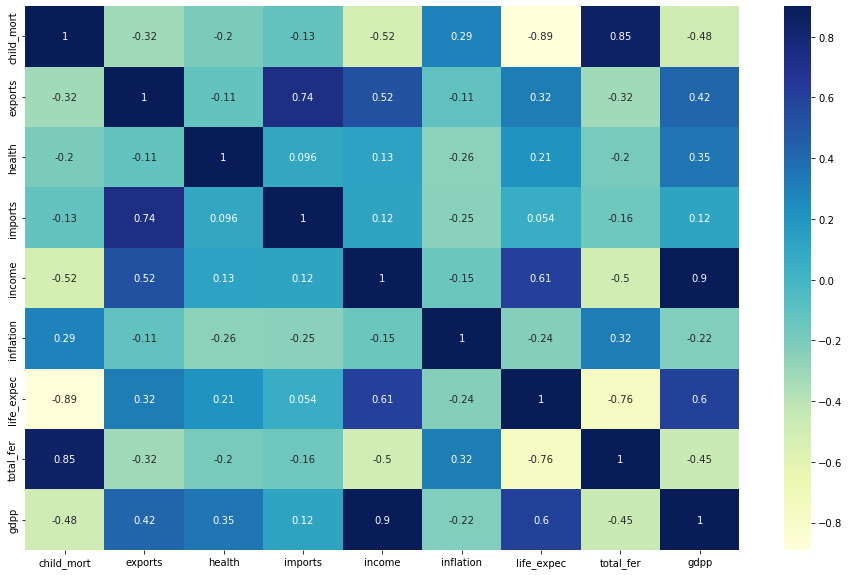

In [10]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), vmax=0.9, vmin=-0.89, annot = True, cmap="YlGnBu")
plt.show()

In [11]:
#There are features with high correlation. Therefore, we may use PCA.

In [12]:
#Scaling Data

In [13]:
from sklearn.preprocessing import StandardScaler
numerical = df.drop('country', axis=1)
standard_scaler = StandardScaler()
numerical = standard_scaler.fit_transform(numerical)

In [14]:
numerical=pd.DataFrame(numerical, columns=['child_mort','exports', 'health', 'imports', 'income','inflation','life_expec','total_fer','gdpp'])
numerical

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


# PCA

In [15]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [16]:
pca.fit(numerical)

PCA(random_state=42, svd_solver='randomized')

In [17]:
#Understanding how the variables are loaded on the principal components. 
colnames = list(numerical.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],
                       'PC4':pca.components_[3], 'PC5':pca.components_[4],'PC6':pca.components_[5],
                       'PC7':pca.components_[6], 'PC8':pca.components_[7],'PC9':pca.components_[8],
                       'Feature':colnames})
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Feature
0,-0.419519,0.192884,-0.029544,0.370653,-0.168970,0.200628,-0.079489,-0.682743,0.327542,child_mort
1,0.283897,0.613163,0.144761,0.003091,0.057616,-0.059333,-0.707303,-0.014197,-0.123082,exports
2,0.150838,-0.243087,-0.596632,0.461897,0.518000,0.007276,-0.249831,0.072497,0.113088,health
3,0.161482,0.671821,-0.299927,-0.071907,0.255376,-0.030032,0.592190,-0.028946,0.099037,imports
4,0.398441,0.022536,0.301548,0.392159,-0.247150,0.160347,0.095562,0.352624,0.612982,income
5,-0.193173,-0.008404,0.642520,0.150442,0.714869,0.066285,0.104633,-0.011538,-0.025236,inflation
6,0.425839,-0.222707,0.113919,-0.203797,0.108220,-0.601127,0.018486,-0.504664,0.294040,life_expec
7,-0.403729,0.155233,0.019549,0.378304,-0.135262,-0.750689,0.028826,0.293353,-0.026336,total_fer
8,0.392645,-0.046022,0.122977,0.531995,-0.180167,0.016779,0.242998,-0.249696,-0.625646,gdpp


In [18]:
#Let's check the variance ratios
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

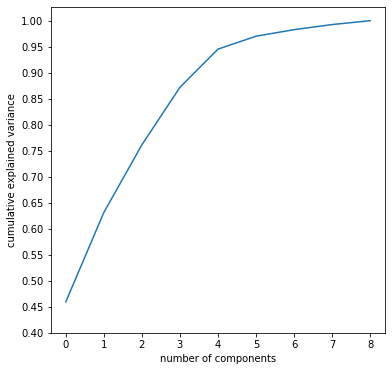

In [19]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (6,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.yticks(np.arange(0.4,1.05,0.05))
plt.show()

    Around 95% of the variance is being explained by 5 components

## Dimensionality reduction using incremental PCA:

In [20]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [21]:
df_final = pca_final.fit_transform(numerical)
df_final.shape

(167, 5)

### Correlation after PCA

<AxesSubplot:>

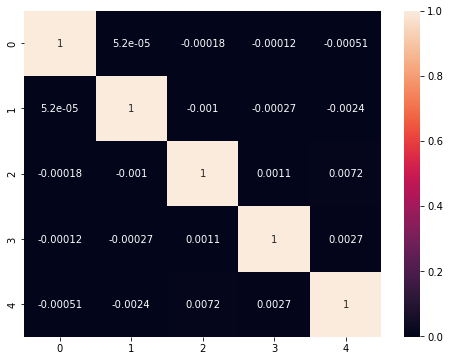

In [22]:
corrmat = np.corrcoef(df_final.transpose())

plt.figure(figsize = (8,6))
sns.heatmap(corrmat,annot = True)

    Here, we can see that the correlations are almost equal to zero. 

In [23]:
pc = np.transpose(df_final)
df_final = pd.DataFrame({'PC1':pc[0],'PC2':pc[1], 'PC3':pc[2], 'PC4':pc[3],'PC5':pc[4]})
df_final.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227
3,-2.932714,1.698771,1.525076,0.855595,-0.214778
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186


## Hopkins Statistics

In [24]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [25]:
hopkins(df_final)

0.8398241275457852

    Since the value is > 0.7 the given dataset has a good tendency to form clusters.

In [26]:
df_km = df_final

# K-Means Clustering

## K-means with some K

### Sum of Squared Distance

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


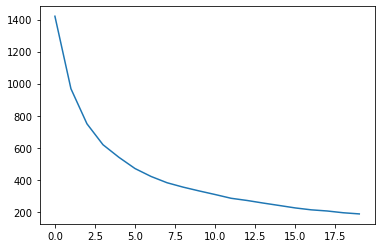

In [27]:
from sklearn.cluster import KMeans
wcss = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_km)
    wcss.append(model_clus.inertia_)

plt.plot(wcss)

### Silhouette Analysis

In [28]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(df_km)
    sse_.append([k, silhouette_score(df_km, kmeans.labels_)])

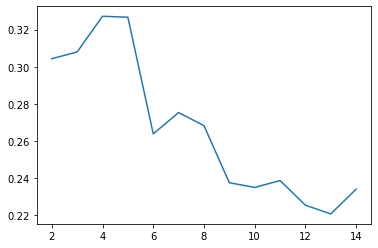

In [29]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

    By looking silhouette analysis, we see the highest peak is at k =5 and in sum of squared distances graph ,
    we see that the elbow is in the range of 3 to 5 , so let us take k as 5.

## Kmeans with K= 5

In [30]:
model_clust = KMeans(n_clusters = 5, max_iter=50,random_state = 50)
model_clust.fit(df_km)

KMeans(max_iter=50, n_clusters=5, random_state=50)

In [31]:
df_km1 = df_final
df_km1.index = pd.RangeIndex(len(df_km1.index))
countries_detail_km = pd.concat([df_km1, pd.Series(model_clust.labels_)], axis=1)
countries_detail_km.columns = ['PC1', 'PC2','PC3','PC4','PC5','ClusterID']
countries_detail_km.head()

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,1
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,2
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,2
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,1
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,2


In [32]:
countries_detail_km['ClusterID'].value_counts()

2    86
1    45
0    32
3     3
4     1
Name: ClusterID, dtype: int64

## Scatterplot b/w PC components and cluster ID

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

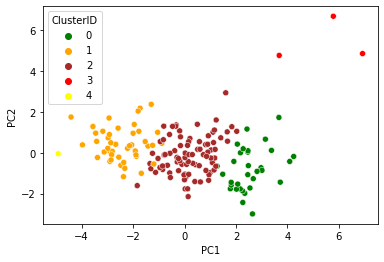

In [33]:
# scatter plot for PC1, PC2 and clusterId
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=countries_detail_km, palette=['green','orange','brown','red','yellow'])

<AxesSubplot:xlabel='PC3', ylabel='PC4'>

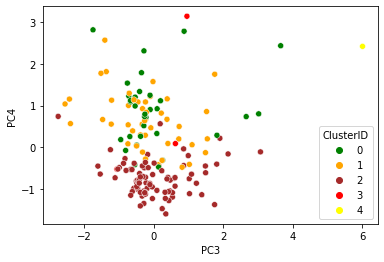

In [34]:
# scatter plot for PC3, PC4 and clusterId
sns.scatterplot(x='PC3',y='PC4',hue='ClusterID',legend='full',data=countries_detail_km,palette=['green','orange','brown','red','yellow'])

In [35]:
# merge b/w km df and actually data
country_merge_km=pd.merge(df.reset_index(),countries_detail_km,left_index=True,right_index=True )
country_merge_km.head()

,index,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterID
0,0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.913000,0.091969,-0.721242,1.001838,-0.146765,1
1,1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.429870,-0.589373,-0.328611,-1.165014,0.153205,2
2,2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.285289,-0.452139,1.232051,-0.857767,0.191227,2
3,3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-2.932714,1.698771,1.525076,0.855595,-0.214778,1
4,4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.033371,0.133853,-0.216699,-0.846638,-0.193186,2


### Scatter plot between actual variables and cluster id

<AxesSubplot:xlabel='child_mort', ylabel='health'>

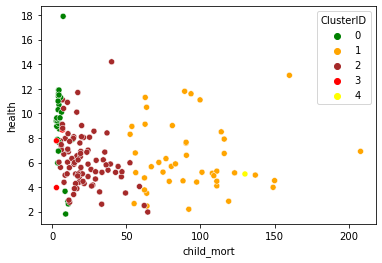

In [36]:
sns.scatterplot(x='child_mort',y='health',hue='ClusterID',legend='full',data=country_merge_km,palette=['green','orange','brown','red','yellow'])

<AxesSubplot:xlabel='income', ylabel='gdpp'>

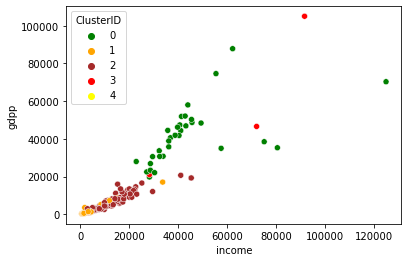

In [37]:
# scatterplot between income, gdpp and cluster ID
sns.scatterplot(x='income',y='gdpp',hue='ClusterID',legend='full',data=country_merge_km,palette=['green','orange','brown','red','yellow'])

<AxesSubplot:xlabel='health', ylabel='income'>

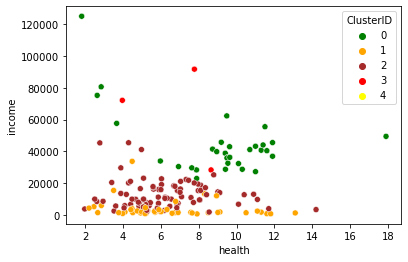

In [38]:
# scatterplot for health, income for different cluster id
sns.scatterplot(x='health',y='income',hue='ClusterID',legend='full',data=country_merge_km,palette=['green','orange','brown','red','yellow'])

<AxesSubplot:xlabel='child_mort', ylabel='inflation'>

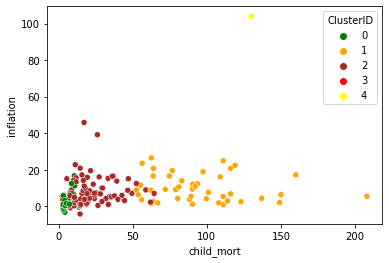

In [39]:
# scatterplot for infaltion, child mort for different cluster id
sns.scatterplot(y='inflation',x='child_mort',hue='ClusterID',legend='full',data=country_merge_km,palette=['green','orange','brown','red','yellow'])

In [40]:
country_final=country_merge_km.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
country_final.head()

,index,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [42]:
country_final=country_final.drop('index', axis=1)
country_final

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


## Analysis of the clusters

In [44]:
child_mort_mean = pd.DataFrame(country_final.groupby(["ClusterID"]).child_mort.mean())
exports_mean= pd.DataFrame(country_final.groupby(["ClusterID"]).exports.mean())
health_mean = pd.DataFrame(country_final.groupby(["ClusterID"]).health.mean())
imports_mean = pd.DataFrame(country_final.groupby(["ClusterID"]).imports.mean())
income_mean = pd.DataFrame(country_final.groupby(["ClusterID"]).income.mean())
inflat_mean = pd.DataFrame(country_final.groupby(["ClusterID"]).inflation.mean())
life_expec_mean = pd.DataFrame(country_final.groupby(["ClusterID"]).life_expec.mean())
total_fer_mean = pd.DataFrame(country_final.groupby(["ClusterID"]).total_fer.mean())
gdpp_mean = pd.DataFrame(country_final.groupby(["ClusterID"]).gdpp.mean())

In [47]:
country_analysis_df = pd.concat([pd.Series([0,1,2,3,4]),child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflat_mean,life_expec_mean,
                                 total_fer_mean,gdpp_mean], axis=1)

In [48]:
country_analysis_df.columns = ["ClusterID","child_mort_mean","exports_mean","health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
country_analysis_df

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,5.181250,46.118750,9.088437,40.584375,44021.875000,2.513844,80.081250,1.788437,42118.750000
1,1,93.384444,29.009111,6.372889,43.060000,3720.955556,9.873889,58.980000,4.999556,1856.044444
2,2,21.867442,41.054523,6.222791,47.754255,12671.744186,7.713884,72.805814,2.326977,6496.069767
3,3,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667
4,4,130.000000,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2330.000000


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\l

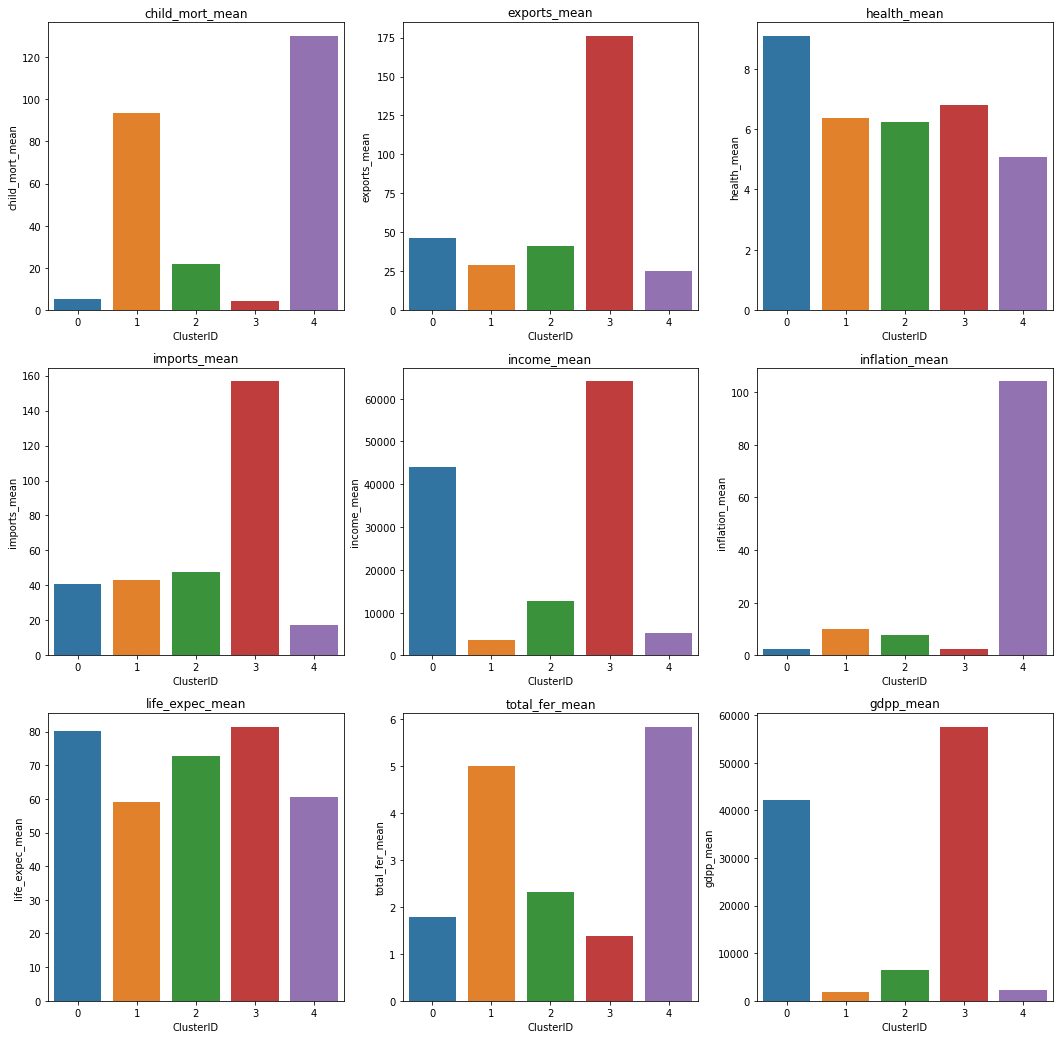

In [49]:
plt.figure(figsize = (18,18))
plt.figure(1)

# subplot 1
plt.subplot(3, 3, 1)
plt.title("child_mort_mean")
sns.barplot(country_analysis_df.ClusterID, country_analysis_df.child_mort_mean)

# subplot 2 
plt.subplot(3, 3, 2)
plt.title("exports_mean")
sns.barplot(country_analysis_df.ClusterID, country_analysis_df.exports_mean)

# subplot 3
#plt.figure(2)
plt.subplot(3, 3, 3)
plt.title("health_mean")
sns.barplot(country_analysis_df.ClusterID, country_analysis_df.health_mean)

# subplot 4 
plt.subplot(3, 3, 4)
plt.title("imports_mean")
sns.barplot(country_analysis_df.ClusterID, country_analysis_df.imports_mean)

# subplot 5 
plt.subplot(3, 3, 5)
plt.title("income_mean")
sns.barplot(country_analysis_df.ClusterID, country_analysis_df.income_mean)

# subplot 6 
plt.subplot(3, 3, 6)
plt.title("inflation_mean")
sns.barplot(country_analysis_df.ClusterID, country_analysis_df.inflation_mean)

# subplot 7 
plt.subplot(3, 3, 7)
plt.title("life_expec_mean")
sns.barplot(country_analysis_df.ClusterID, country_analysis_df.life_expec_mean)

# subplot 8
plt.subplot(3, 3, 8)
plt.title("total_fer_mean")
sns.barplot(country_analysis_df.ClusterID, country_analysis_df.total_fer_mean)

# subplot 9
plt.subplot(3, 3, 9)
plt.title("gdpp_mean")
sns.barplot(country_analysis_df.ClusterID, country_analysis_df.gdpp_mean)

plt.show()


    Looking at the graph we are certain that cluster 1 is our cluster of concern. Because:

    1. It has highest child mortality
    2. Lowest income
    3. Highest Inflation
    4. Compartively low life expectancy 
    5. Highest total fertility 
    6. Lowest gdpp.

In [50]:
#Getting top 10 countries which need direst attention.
cluster_km=country_final[country_final['ClusterID']==1]
cluster_km.sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,1
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,1
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,1
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,1
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,1
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,1
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,1
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,1
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482,1


    As per K- means clustering, the country which are direst need of aid are:

    1. Burundi
    2. Liberia
    3. Congo, Dem. Rep
    4. Niger
    5. Sierra Leone
    6. Madagascar
    7. Mozambique
    8. Central African Republic
    9. Malawi
    10.Eritrea